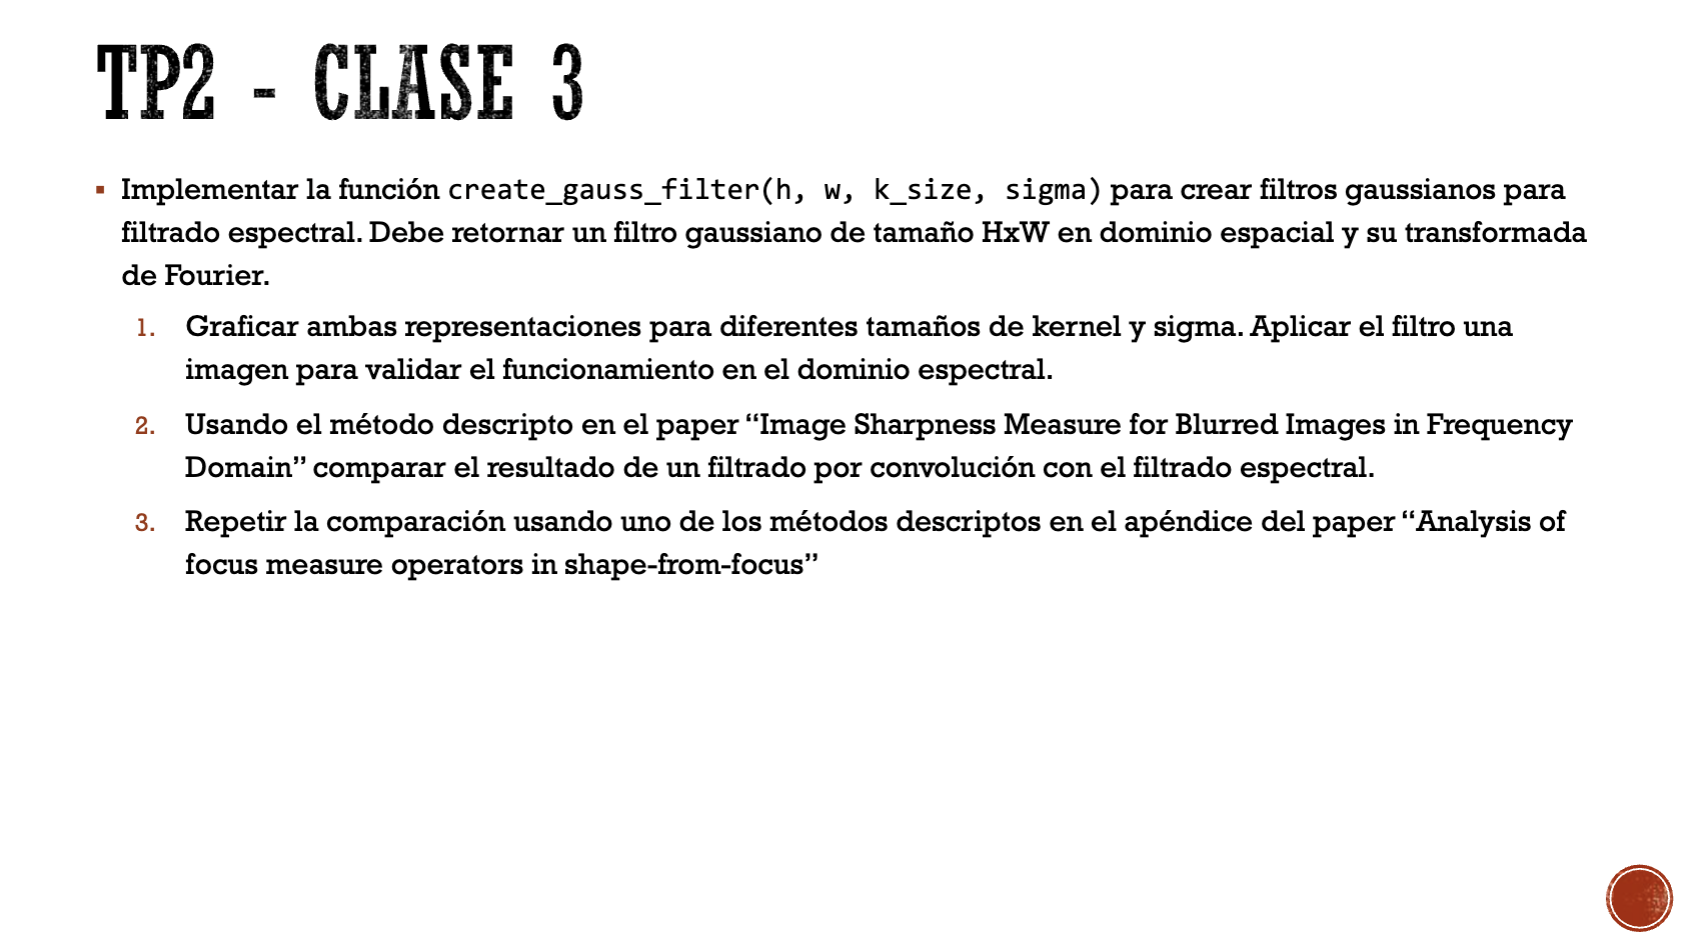](attachment:image.png)

Alumno: SILVA, VÍCTOR DAVID

CEIA: cohorte 14

Bimestre: 2do

Año: 2024

In [20]:
# Dependencias
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Implementar la función create_gauss filter(h, w, k_size, sigma) para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada
de Fourier.
1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una
imagen para validar el funcionamiento en el dominio espectral.

In [21]:
def create_gauss_filter(h: int, w: int, k_size: int, sigma: float) -> np.array:
    """
    Esta función recibe el alto y ancho de una imagen, el tamaño de kernel y el sigma de para el filtro Gaussiano 
    y devuelve el filtro Gaussiano y el filtro Gaussiano con la transformada de Fourier aplicada.
    
    :param h: altura de la imagen.
    :type h: int

    :param w: ancho de la imagen.
    :type h: int

    :param k_size: tamaño del núcleo, positivo impar (3,5,...)
    :type ksize: int

    :param sigma: Desvío estándar de la Gaussiana. Si no es positivo, se calcula como sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8 .
    :type sigma: float
    """

    # Se crea el kernel 2D
    kernel = cv.getGaussianKernel(ksize= k_size, sigma= sigma)
    kernel2D = kernel * kernel.T

    # Se crea una matiz de ceros de dimension h x w
    gauss_filter = np.zeros((h, w))

    # Se calcula el centro donde se va a colocar el kernel2D
    x_cent = w // 2
    y_cent = h // 2
    ksize_half = int(k_size) // 2

    # Se centra el kernel2D en el filtro Gaussino
    gauss_filter[y_cent - ksize_half : y_cent + ksize_half + 1, x_cent - ksize_half : x_cent + ksize_half + 1] = kernel2D

    # Se aplica transforamada de Fourier al filtro Gaussiano
    gauss_filter_fourier = np.fft.fft2(gauss_filter)

    return gauss_filter, gauss_filter_fourier


A continuación, se carga una imagen, se obtiene sus dimensiones, y se propone un juego de valores de k_size y sigma para obtener diferentes filtros usando la función create_gaussian_filter.

In [22]:
# Se carga una imagen
img = cv.imread('TP2_image.jpg', cv.IMREAD_GRAYSCALE)

# Se obtienen las dimensiones de la imagen
h, w = img.shape

In [23]:
# Se crea una lista de sigmas a evaluar y otras listas vacías
sigma_list = [1, 2, 3, 4, 5, 6]
kernel_list = []
kernel_tf_list = []
img_filtred_spectral_domain_sigma = []

# Se le aplica transformada de Fourier a la imagen
img_fft = np.fft.fft2(img) 

# Se crea una figura
plt.figure(figsize=(12,12))

# Se cambia el sigma a evaluar en cada iteración
for k in range(len(sigma_list)):

    # Se aplica la función create_gauss_filter
    kernel, kernel_tf = create_gauss_filter(h, w, k_size=15, sigma=sigma_list[k])
    
    # Se filtra haciendo el producto entre el kernel y la imagen con la transformada de Fourier aplicada
    filtered = img_fft * kernel_tf 

    # Se antitransforma, se toma la parte real, porque queda un residuo de la parte imaginaria
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered))) 

    # Se agregan los elementos a las listas correspondientes 
    kernel_list.append(kernel)
    kernel_tf_list.append(kernel_tf_list)
    img_filtred_spectral_domain_sigma.append(img_gauss)

    # Se muestra el filtro gaussiano
    plt.subplot(len(sigma_list),3,k*3+1)
    plt.axis('off')
    plt.title("Kernel Gausiano con sigma={}".format(sigma_list[k]))
    plt.imshow(kernel_list[k], cmap='jet')
    
    # Se muestra el filtro gaussiano en el dominio de la frecuencia
    plt.subplot(len(sigma_list),3,k*3+2)
    plt.axis('off')
    plt.title("FFT del kernel con sigma={}".format(sigma_list[k]))
    tf_shifted = np.fft.fftshift(kernel_tf)
    plt.imshow(np.abs(tf_shifted), cmap='jet')

    # Se muestra la imagen filtrada en el domino espectral
    plt.subplot(len(sigma_list),3,k*3+3)
    plt.axis('off')
    plt.title("Desenfoque gausiano con sigma={}".format(sigma_list[k]))
    plt.imshow(img_filtred_spectral_domain_sigma[k], cmap='gray')

# Se ajusta el diseño
plt.tight_layout()

# Se muestra la figura
plt.show()

In [24]:
# Se crea una lista de ksize a evaluar y otras listas vacías
ksize_list = [5, 7, 9, 11, 13, 15] 
kernel_list = []
kernel_tf_list = []
img_filtred_spectral_domain_ksize = []

# Se le aplica transformada de Fourier a la imagen
img_fft = np.fft.fft2(img) 

# Se crea una figura
plt.figure(figsize=(12,12))

# Se cambia el ksize a evaluar en cada iteración
for k in range(len(ksize_list)):

    # Se aplica la función create_gauss_filter
    kernel, kernel_tf = create_gauss_filter(h, w, k_size=ksize_list[k], sigma=3)
    
    # Se filtra haciendo el producto entre el kernel y la imagen con la transformada de Fourier aplicada
    filtered = img_fft * kernel_tf 

    # Se antitransforma, se toma la parte real, porque queda un residuo de la parte imaginaria
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered))) 

    # Se agregan los elementos a las listas correspondientes 
    kernel_list.append(kernel)
    kernel_tf_list.append(kernel_tf_list)
    img_filtred_spectral_domain_ksize.append(img_gauss)

    # Se muestra el filtro gaussiano
    plt.subplot(len(ksize_list),3,k*3+1)
    plt.axis('off')
    plt.title("Kernel Gausiano con ksize={}".format(ksize_list[k]))
    plt.imshow(kernel_list[k], cmap='jet')
    
    # Se muestra el filtro gaussiano en el dominio de la frecuencia
    plt.subplot(len(ksize_list),3,k*3+2)
    plt.axis('off')
    plt.title("FFT del kernel con ksize={}".format(ksize_list[k]))
    tf_shifted = np.fft.fftshift(kernel_tf)
    plt.imshow(np.abs(tf_shifted), cmap='jet')

    # Se muestra la imagen filtrada en el domino espectral
    plt.subplot(len(ksize_list),3,k*3+3)
    plt.axis('off')
    plt.title("Desenfoque gausiano con ksize={}".format(ksize_list[k]))
    plt.imshow(img_filtred_spectral_domain_ksize[k], cmap='gray')

# Se ajusta el diseño
plt.tight_layout()

# Se muestra la figura
plt.show()

2. Usando el método descripto en el paper "Image Sharpness Measure for Blurred Images in Frequency
Domain"' comparar el resultado de un filtrado por convolución con el filtrado espectral.

In [25]:
# Se lee la imagen
img = cv.imread('TP2_image.jpg', cv.IMREAD_GRAYSCALE)

# Se muestra la imagen
plt.figure(figsize=(10,5))
plt.imshow(img, cmap='gray')
plt.show()

Se crea una función llamada image_quality_measure que devuelve la calidad de una imagen en términos de enfoque.

In [26]:
def image_quality_measure(input_image: np.ndarray) -> float:
  """
  Esta función recibe una imagen y devuelve la una medida de la calidad de la imagen en términos de enfoque.

  :param input_image: imagen de entrada.
  :type input_image: np.ndarray
  """
  
  # Step 1 - Compute F (which is the Fourier Transform representation of image I)
  F = np.fft.fft2(input_image)

  # Step 2 - Find Fc (which is obtained by shifting the origin of F to centre)
  Fc = np.fft.fftshift(F)

  # Step 3 - Calculate AF = abs(Fc) (where AF is the absolute value of the centered Fourier transform of image I)
  AF = np.abs(Fc)

  # Step 4 - Calculate M = max(AF) (where M is the maximum value of the frequency component in F)
  M = np.max(AF)

  # Step 5 - Calculate TH (where TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000)
  thres = M/1000
  TH = np.sum(AF > thres)

  # Step 6 - Calcualte FM (Image Quality mesure)
  height, width ,  = input_image.shape
  FM =  TH / (height * width)

  return FM

Se usa la función image_quality_measure para diferentes valores de sigma tanto en un filtro en el domino espacial (GaussianBlur) como en el domino de la espectral (create_gauss_filter, usando la lista del ejercicio anterior img_filtrada_dominio_espectral). Luego se grafican los resultados de manera comparativa.

Se varía ahora el valor de sigma y se deja fijo el ksize.

In [27]:
# Se usa la misma lista de sigmas y se crean listas vacías
sigma_list = [1, 2, 3, 4, 5, 6]
FM_img_filtred_spacial_domain_list = []
FM_img_filtred_spectral_domain_list = []

for k in range(len(sigma_list)):
    # Se calcula el filtrado en el dominio espacial con Gaussian Blur para un sigma de la lista
    gaussian_blur = cv.GaussianBlur(img, ksize=(15, 15), sigmaX=sigma_list[k],  sigmaY=sigma_list[k])

    # Se mide la calidad de enfoque de la imagen filtrada en el dominio espacial
    focus_measure = image_quality_measure(gaussian_blur)

    # Se añade a la lista el valor obtenido de la calidad
    FM_img_filtred_spacial_domain_list.append(focus_measure)

    # Se mide la calidad de enfoque de la imagen filtrada en el domino espectral, obtenidas estas imágenes del ejercicio 1
    FM_img_filtred_spectral_domain = image_quality_measure(img_filtred_spectral_domain_sigma[k])

    # Se añade a la lista el valor obtenido de la calidad
    FM_img_filtred_spectral_domain_list.append(FM_img_filtred_spectral_domain)

# Se muestran los resultados
plt.figure(figsize=(10,5))
plt.plot(sigma_list,FM_img_filtred_spacial_domain_list, label='Spatial Domain', marker='o')
plt.plot(sigma_list,FM_img_filtred_spectral_domain_list, label='Spectral Domain', marker ='x')
plt.xlabel("Sigma")
plt.ylabel("Image Quality Measure (FM)")
plt.title('Image Quality Measure vs Sigma')
plt.legend()
plt.grid(True)
plt.show()


Se varía ahora el tamaño de ksize y se deja fijo el sigma.

In [28]:
# Se crea una lista de ksize a evaluar y otras listas vacías
ksize_list = [5, 7, 9, 11, 13, 15]
FM_img_filtred_spacial_domain_list = []
FM_img_filtred_spectral_domain_list = []

for k in range(len(ksize_list)):
    # Se calcula el filtrado en el dominio espacial con Gaussian Blur para un ksize de la lista
    gaussian_blur = cv.GaussianBlur(img, ksize=(ksize_list[k], ksize_list[k]), sigmaX=3,  sigmaY=3)

    # Se mide la calidad de enfoque de la imagen filtrada en el dominio espacial
    focus_measure = image_quality_measure(gaussian_blur)

    # Se añade a la lista el valor obtenido de la calidad
    FM_img_filtred_spacial_domain_list.append(focus_measure)

    # Se mide la calidad de enfoque de la imagen filtrada en el domino espectral, obtenidas estas imágenes del ejercicio 1
    FM_img_filtred_spectral_domain = image_quality_measure(img_filtred_spectral_domain_ksize[k])

    # Se añade a la lista el valor obtenido de la calidad
    FM_img_filtred_spectral_domain_list.append(FM_img_filtred_spectral_domain)

# Se muestran los resultados
plt.figure(figsize=(10,5))
plt.plot(ksize_list,FM_img_filtred_spacial_domain_list, label='Spatial Domain', marker='o')
plt.plot(ksize_list,FM_img_filtred_spectral_domain_list, label='Spectral Domain', marker ='x')
plt.xlabel("ksize")
plt.ylabel("Image Quality Measure (FM)")
plt.title('Image Quality Measure vs ksize')
plt.legend()
plt.grid(True)
plt.show()


Se observa en la gráfica que la tendencia es la misma y los valores son próximos.

3 - Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper "Analysis of
focus measure operators in shape-from-focus"

Como método se eligió Gradient energy

In [32]:
def gradient_energy(input_image: np.ndarray, ksize = 3) -> float:
    """
    Esta función recibe una imagen y devuelve la una medida de la calidad de la imagen en términos de enfoque.

    :param input_image: imagen de entrada.
    :type input_image: np.ndarray
    """
    
    # Se usa el filtro de Sobel para obtener las derivadas en la dirección de x y de y
    Ix = cv.Sobel(input_image, cv.CV_64F, 1, 0, ksize = ksize) 
    Iy = cv.Sobel(input_image, cv.CV_64F, 0, 1, ksize = ksize)
    
    # Se calcula la suma del cuadrado de las derivadas en la dirección de x y de y
    sum_square_Ix_Iy = Ix**2 + Iy**2
    
    # Se crear un kernel para un filtro de suavizado del tamaño de la vecindad (ksize)
    kernel = np.ones((ksize, ksize), np.float64)

    # Calcular la suma de la energía del gradiente en la vecindad local
    local_energy = cv.filter2D(sum_square_Ix_Iy, -1, kernel) 

    # Se calcula la media global de las local_energy
    global_gradient_energy = np.mean(local_energy)

    return global_gradient_energy

Se usa la función gradient_energy para diferentes valores de sigma tanto en un filtro en el domino espacial (GaussianBlur) como en el domino de la espectral (create_gauss_filter). Luego se grafican los resultados de manera comparativa.

Se varía ahora el tamaño de ksize y se deja fijo el sigma.

In [33]:
# Se usa la misma lista de sigmas y se crean listas vacías
sigma_list = [1, 2, 3, 4, 5, 6]
FM_img_filtred_spacial_domain_list = []
FM_img_filtred_spectral_domain_list = []

for k in range(len(sigma_list)):
    # Se calcula el filtrado en el dominio espacial con Gaussian Blur para un sigma de la lista
    gaussian_blur = cv.GaussianBlur(img, ksize=(15, 15), sigmaX=sigma_list[k],  sigmaY=sigma_list[k])

    # Se mide la calidad de enfoque de la imagen filtrada en el dominio espacial
    focus_measure = gradient_energy(gaussian_blur)
    
    # Se añade a la lista el valor obtenido de la calidad
    FM_img_filtred_spacial_domain_list.append(focus_measure)

    # Se mide la calidad de enfoque de la imagen filtrada en el domino espectral, obtenidas estas imágenes del ejercicio 1
    FM_img_filtred_spectral_domain = gradient_energy(img_filtred_spectral_domain_sigma[k])

    # Se añade a la lista el valor obtenido de la calidad
    FM_img_filtred_spectral_domain_list.append(FM_img_filtred_spectral_domain)

# Se muestran los resultados
plt.figure(figsize=(10,5))
plt.plot(sigma_list,FM_img_filtred_spacial_domain_list, label='Spatial Domain', marker='o')
plt.plot(sigma_list,FM_img_filtred_spectral_domain_list, label='Spectral Domain', marker ='x')
plt.xlabel("Sigma")
plt.ylabel("Gradient Energy")
plt.title('Gradient Energy vs Sigma')
plt.legend()
plt.grid(True)
plt.show()


Se varía ahora el tamaño de ksize y se deja fijo el sigma.

In [34]:
# Se crea una lista de ksize a evaluar y otras listas vacías
ksize_list = [5, 7, 9, 11, 13, 15]
FM_img_filtred_spacial_domain_list = []
FM_img_filtred_spectral_domain_list = []

for k in range(len(ksize_list)):
    # Se calcula el filtrado en el dominio espacial con Gaussian Blur para un ksize de la lista
    gaussian_blur = cv.GaussianBlur(img, ksize=(ksize_list[k], ksize_list[k]), sigmaX=3,  sigmaY=3)

    # Se mide la calidad de enfoque de la imagen filtrada en el dominio espacial
    focus_measure = gradient_energy(gaussian_blur)

    # Se añade a la lista el valor obtenido de la calidad
    FM_img_filtred_spacial_domain_list.append(focus_measure)

    # Se mide la calidad de enfoque de la imagen filtrada en el domino espectral, obtenidas estas imágenes del ejercicio 1
    FM_img_filtred_spectral_domain = gradient_energy(img_filtred_spectral_domain_ksize[k])

    # Se añade a la lista el valor obtenido de la calidad
    FM_img_filtred_spectral_domain_list.append(FM_img_filtred_spectral_domain)

# Se muestran los resultados
plt.figure(figsize=(10,5))
plt.plot(ksize_list,FM_img_filtred_spacial_domain_list, label='Spatial Domain', marker='o')
plt.plot(ksize_list,FM_img_filtred_spectral_domain_list, label='Spectral Domain', marker ='x')
plt.xlabel("ksize")
plt.ylabel("Gradient Energy")
plt.title('Gradient Energy vs ksize')
plt.legend()
plt.grid(True)
plt.show()


Se observa en la gráfica que la tendencia es la misma y los valores son próximos.